# Evaluation of Website Comparison Tool

### Important Note

Running the script sometimes results in a blocked IP address. Thus the statistics are not correct.

### Imports

In [1]:
import Comparer
import Helper
import os
import json
import matplotlib.pyplot as plt 

In [2]:
_DIR = 'eval_results'
_COMPARE = False

### Visualization

In [3]:
def combine(files):
    combined_stats = {}

    for file in files:
        with open(file, 'r') as json_file:
            data = json.load(json_file)
            if data['url1'] not in combined_stats:
                combined_stats[str(data['url1'])] = {}
                combined_stats[data['url1']][data['url2']] = data['stats']
            else:
                combined_stats[data['url1']][data['url2']] = data['stats']

    return combined_stats

In [4]:
def pretty_print(url1, stats):
    print(f'Domain: {url1}')
    print()
    print(f'URL\t\t\t\tContent\t\tDomain\t\tLinks\t\tImage Sources\t\tScreenshot')
    
    for url, stats in stats.items():
        out = f'{url}'
        for name, values in stats.items():
            for test, value in values.items():
                if test == 'sim_value':
                    value = round(value * 100, 2)
                    if name == 'Content':
                        out += f'{" " * (32 - len(url))}{value}'
                    elif name == 'Screenshots':
                        out += f'\t\t\t{value}'
                    else:
                        out += f'\t\t{value}'
                    break
        print(out)

In [5]:
def plot(url1, stats):
    
    content = []
    domain = []
    links = []
    img = []
    screen = []
    
    for url, stats in stats.items():
        for name, values in stats.items():
            for test, value in values.items():
                if test == 'sim_value':
                    if name == 'Content':
                        content.append(value)
                    elif name == 'Domain':
                        domain.append(value)
                    elif name == 'Links':
                        links.append(value)
                    elif name == 'Image-Urls':
                        img.append(value)
                    elif name == 'Screenshots':
                        screen.append(value)
                        
    content = sum(content) / len(content)  * 100 if content else 0
    domain = sum(domain) / len(domain)  * 100 if domain else 0
    links = sum(links) / len(links)  * 100 if links else 0
    img = sum(img) / len(img)  * 100 if img else 0
    screen = sum(screen) / len(screen)  * 100 if screen else 0
    
    tests = ['Content', 'Domain', 'Links', 'Image Src', 'Screenshots']
    values = [content, domain, links, img, screen]
    plt.bar(tests, values)
    plt.title(f'Similarity Values for {url1}')
    plt.ylabel('Percentage')
    plt.ylim([0, 100])
    plt.show()

## Different Domain (Content Field)

In [6]:
sim0 = [
        'https://www.google.com',
        'https://cms.cispa.saarland',
        'https://www.uni-saarland.de/start.html',
        'https://github.com',
        'https://amazon.com',
        'https://twitter.com',
        'https://wikipedia.org',
        'https://www.apple.com/'
       ]

In [7]:
folder = 'sim0'
dd_files = []

In [8]:
comparer = Comparer.Comparer()

for url1 in sim0:
    log_dir = f'{_DIR}/{folder}/{Helper.get_domain(url1)}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim0:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            dd_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

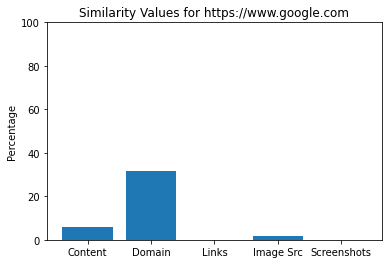

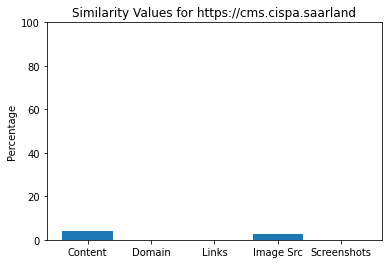

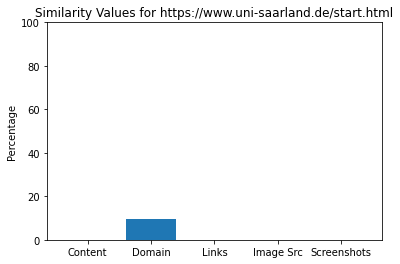

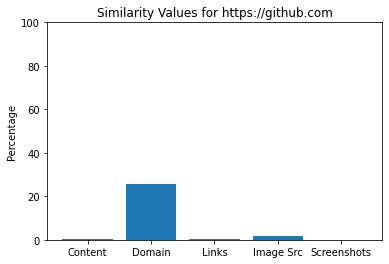

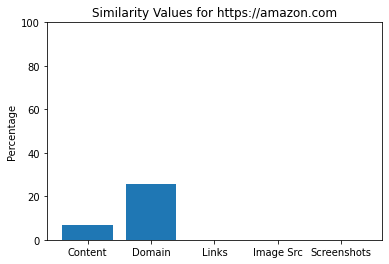

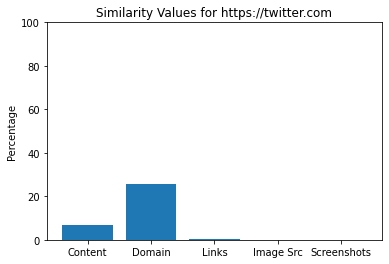

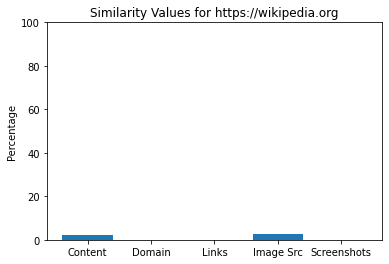

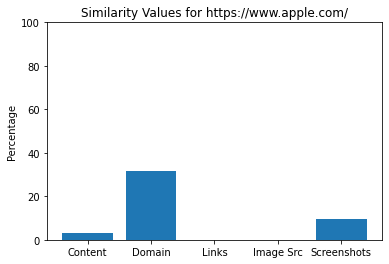

In [9]:
combined_stats = combine(dd_files)
for key, value in combined_stats.items():
    plot(key, value)

## Same Domain

In [10]:
sim1 = [
        'https://cispa.de/de',
        'https://cms.cispa.saarland',
        'https://www.cisa.gov/cybersecurity',
        'https://www.dhs.gov/topic/cybersecurity'
        ]

In [11]:
folder = 'sim1'
sd_files = []

In [12]:
comparer = Comparer.Comparer()

for url1 in sim1:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim1:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            sd_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

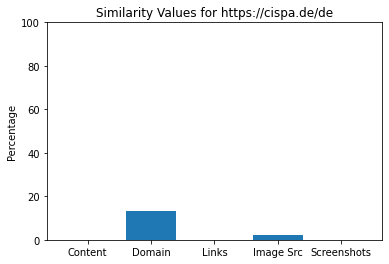

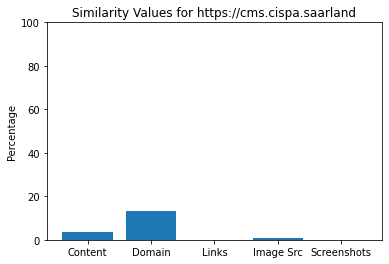

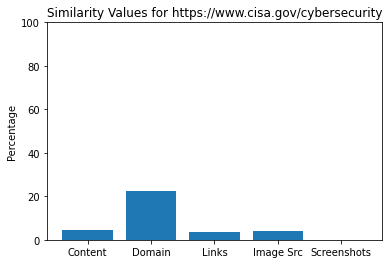

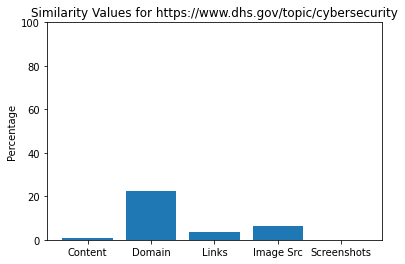

In [13]:
combined_stats = combine(sd_files)
for key, value in combined_stats.items():
    plot(key, value)

## Same Website

### cispa.de

In [14]:
sim20 = [
         'https://cispa.de/de',
         'https://cispa.de/en',
         'https://cispa.de/de/research',
         'https://cispa.de/de/research/publications'
        ]

In [15]:
folder = 'sim20'
sw0_files = []

In [16]:
comparer = Comparer.Comparer()

for url1 in sim20:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim20:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            sw0_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

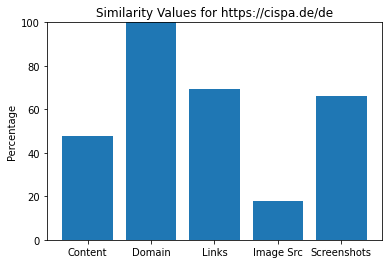

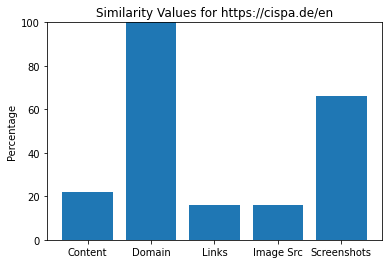

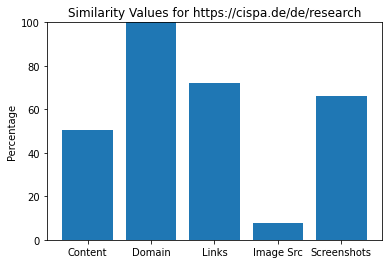

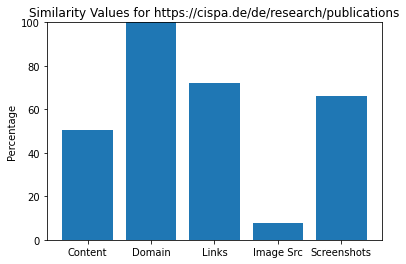

In [17]:
combined_stats = combine(sw0_files)
for key, value in combined_stats.items():
    plot(key, value)

### www.uni-saarland.de

In [18]:
sim21 = [
         'https://www.uni-saarland.de/start.html',
         'https://www.uni-saarland.de/forschung/profil.html',
         'https://www.uni-saarland.de/studium/bewerbung/mehr.html',
         'https://www.uni-saarland.de/international/out/studium.html'
        ]

In [19]:
folder = 'sim21'
sw1_files = []

In [20]:
comparer = Comparer.Comparer()

for url1 in sim21:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim21:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            sw1_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

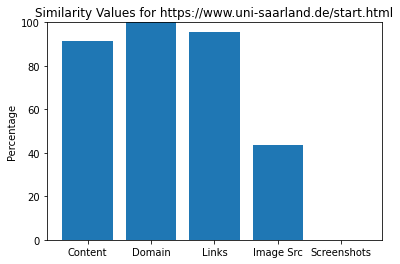

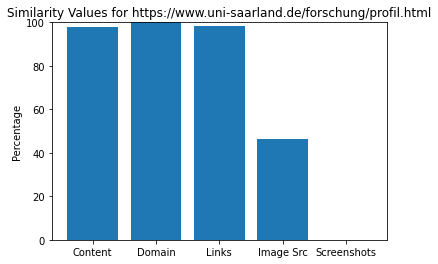

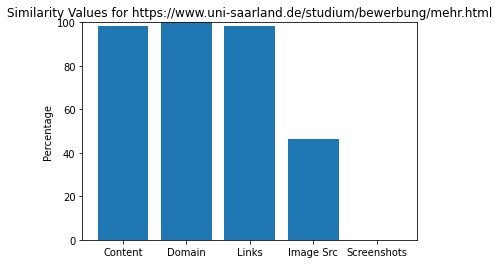

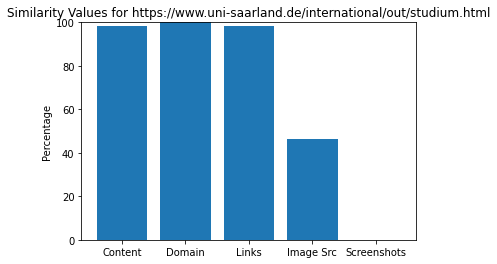

In [21]:
combined_stats = combine(sw1_files)
for key, value in combined_stats.items():
    plot(key, value)

### www.apple.com

In [22]:
# same website - www.uni-saarland.de
sim21 = [
         'https://www.apple.com/mac/',
         'https://www.apple.com/ipad/',
         'https://www.apple.com/music/',
         'https://www.apple.com/shop/gift-cards'
        ]

In [23]:
folder = 'sim22'
sw1_files = []

In [24]:
comparer = Comparer.Comparer()

for url1 in sim21:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim21:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            sw1_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

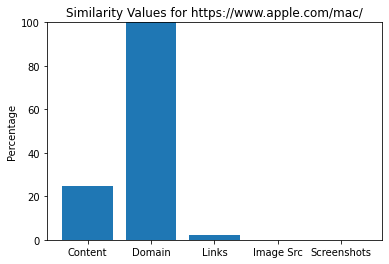

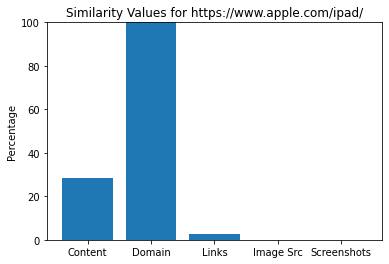

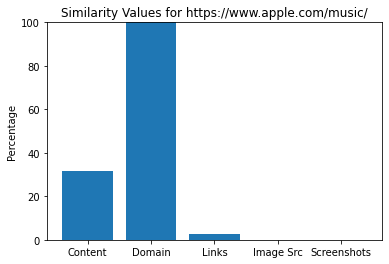

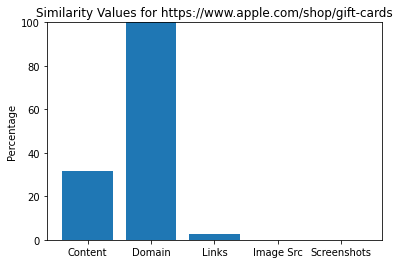

In [25]:
combined_stats = combine(sw1_files)
for key, value in combined_stats.items():
    plot(key, value)

## Alexa Top 12 Websites

In [26]:
alexa = []
with open('top-12-urls.txt', 'r') as wf:
    websites = wf.readlines()
    
for website in websites:
    alexa.append(website.lower()[:-1])

In [27]:
folder = 'alexa'
alexa_files = []

In [28]:
comparer = Comparer.Comparer()

for url1 in alexa:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in alexa:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            alexa_files.append(comparer.enable_logging(f'{log_dir}/'))
            if _COMPARE:
                comparer.compare_websites()

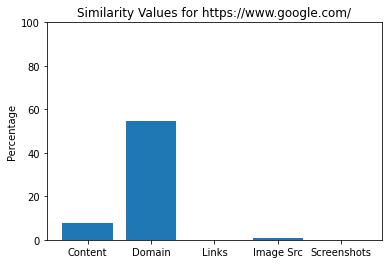

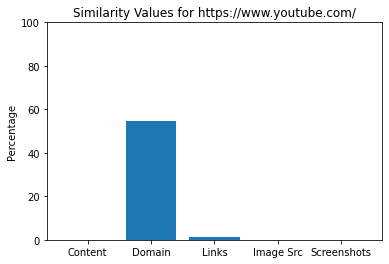

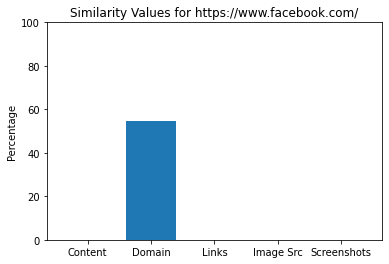

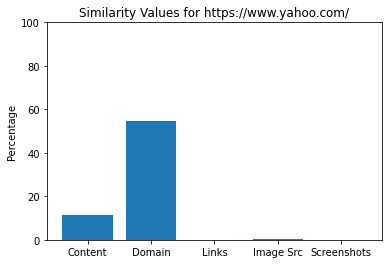

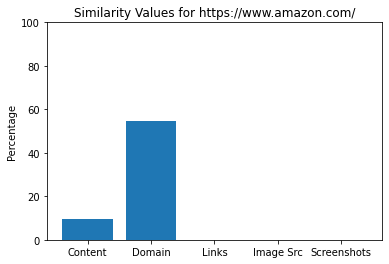

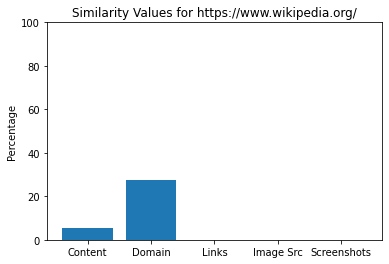

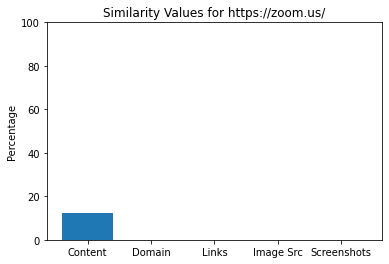

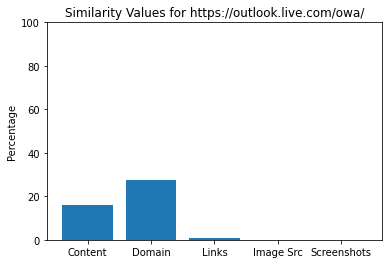

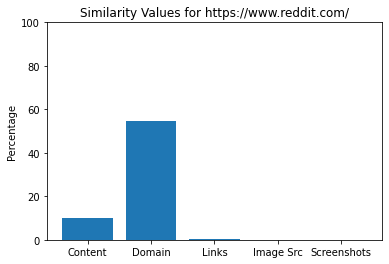

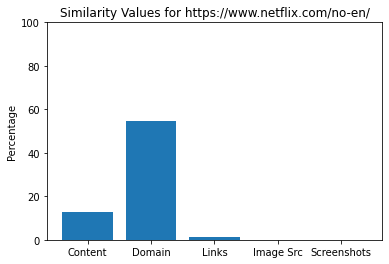

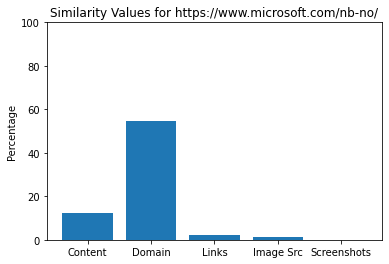

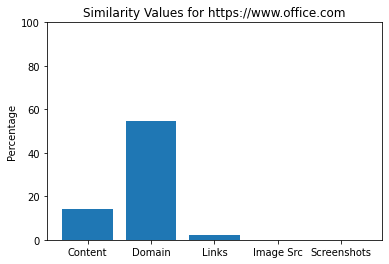

In [29]:
combined_stats = combine(alexa_files)
for key, value in combined_stats.items():
    plot(key, value)

## Reasons for statistics

#### Content

- imprint
- leagal notices
- company information

#### Domains

- components like www, .com, .de
- small domains
    > github.com 
    
    > google.com
    
    > Domain similarity of 50%

#### Links and Image Sources

- typical website link components like wp-content, home, ...

#### Screenshots

- color has huge impact